# Initial setup 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
plt.rcParams['font.size'] = 24

import seaborn as sns
sns.set(font_scale = 2)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.pylabtools import figsize

import os
pro_dir = "."
project_id = "Heart_Diseases"
image_path = os.path.join(pro_dir,"images",project_id)

def save_image(fig_id,tight_layout=True, fig_extension = "png",fig_dimension = 300):
    os.makedirs(image_path,exist_ok = True)
    fig_path = os.path.join(image_path,fig_id + "." + fig_extension)
    print("saving...",fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(fig_path,dpi=fig_dimension)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Exploratory data Analysis

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


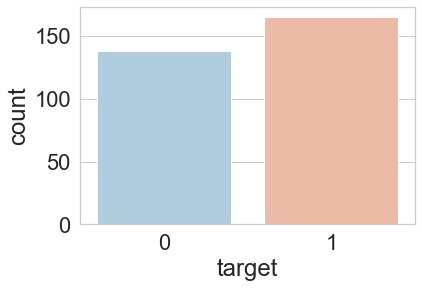

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')

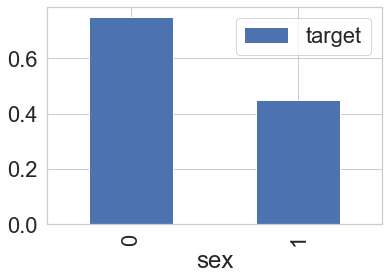

In [7]:
sex_pivot = data.pivot_table(index = "sex",values = "target")
sex_pivot.plot.bar()
plt.show()

In [8]:
data['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

## Create Age Categories

In [9]:
def process_age(df,cut_points,label_names):
    df["age"] = df["age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["age"],cut_points,labels = label_names)
    return df

cut_points = [29,39,49,59,69,79];
label_names = ["29-39","39-49",'49-59','59-69','69-79']

data= process_age(data,cut_points,label_names)

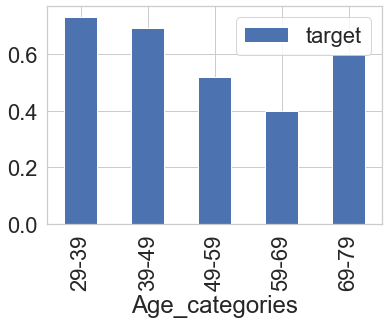

In [10]:
Age_catergories = data.pivot_table(index="Age_categories",values="target")
Age_catergories.plot.bar()
plt.show()

# get correlations of each features in dataset


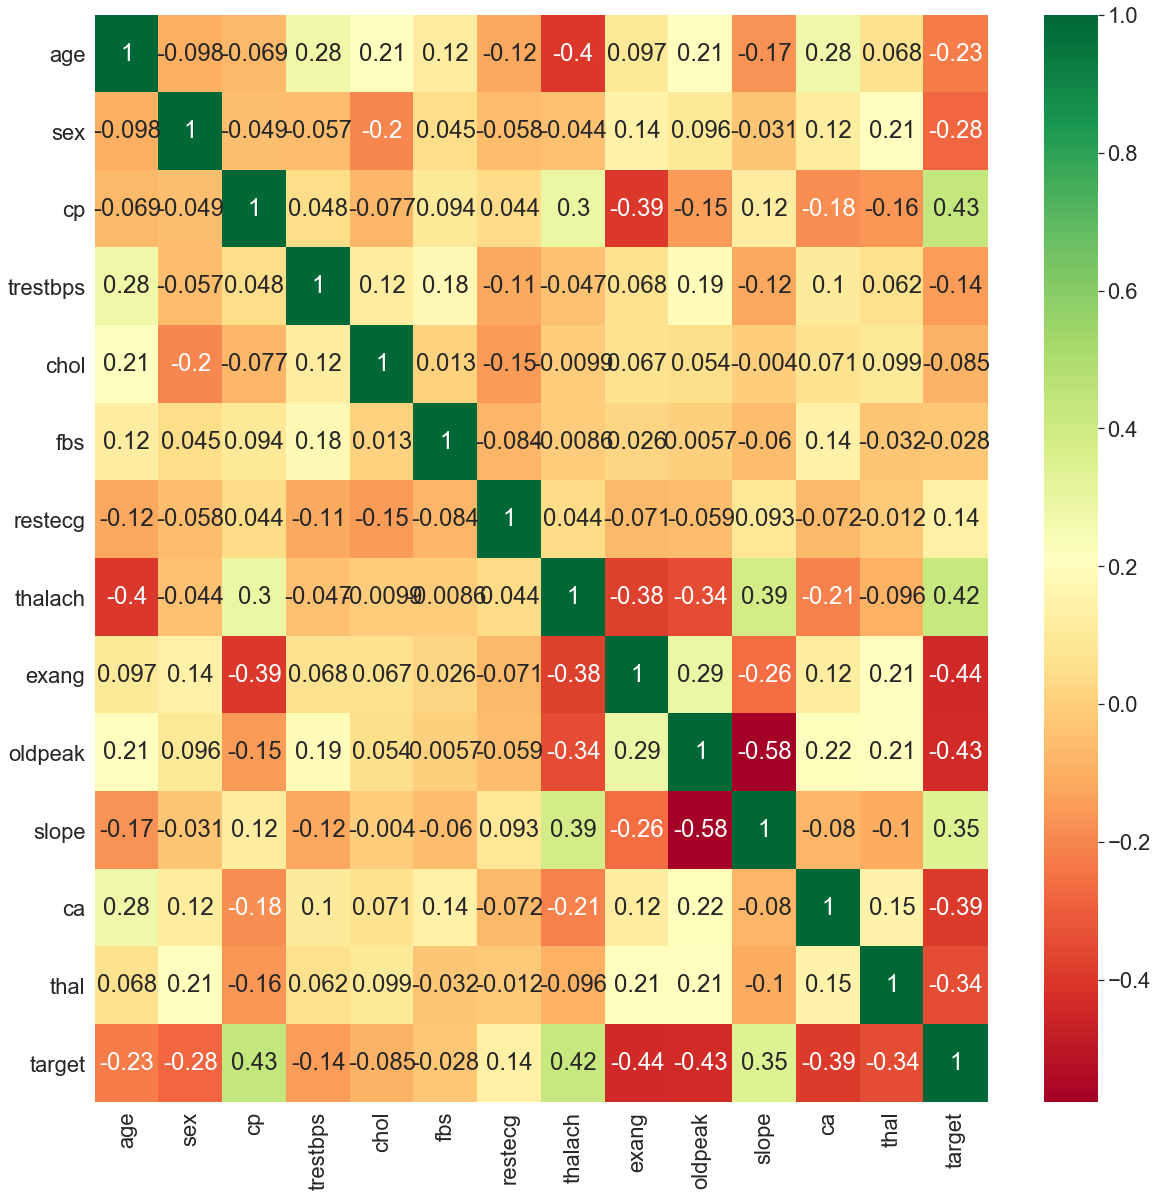

In [11]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4E3F0E708>,
      dtype=object)

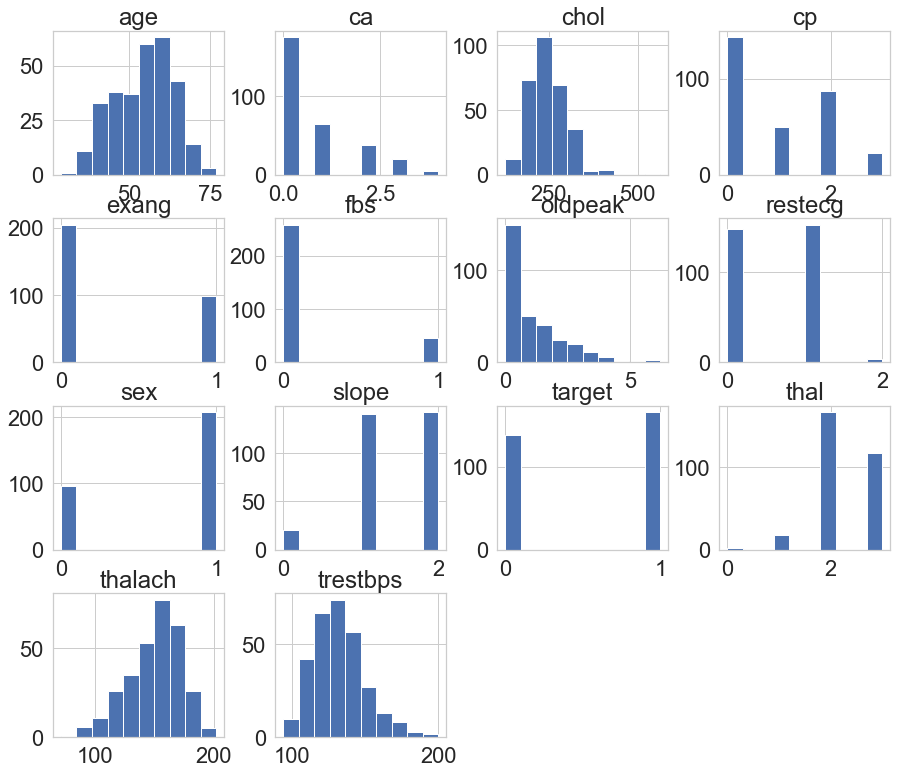

In [12]:
figsize(15,13)
data.hist()

# Features selection and engineering 

In [13]:
dataset = pd.get_dummies(data, columns = ['Age_categories','sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

columns_to_scale = ['trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [15]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,Age_categories_29-39,Age_categories_39-49,Age_categories_49-59,Age_categories_59-69,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,0.763956,-0.256334,0.015443,1.087338,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,37,-0.092738,0.072199,1.633471,2.122573,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,56,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,-0.663867,2.082050,0.583939,-0.379244,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Training and selecting best model

In [16]:
y = dataset['target']
X = dataset.drop(['target','age'], axis = 1)
print(X.shape)
print(y.shape)

(303, 34)
(303,)


In [17]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())


[0.7456989247311827, 0.7821505376344086, 0.8320430107526882, 0.8251612903225807, 0.8313978494623656, 0.8481720430107528, 0.8248387096774193, 0.8381720430107527, 0.8348387096774192, 0.8282795698924732, 0.8182795698924732, 0.8216129032258065, 0.8248387096774193, 0.821505376344086, 0.8213978494623657, 0.8216129032258065, 0.8181720430107526, 0.8217204301075268, 0.8116129032258066, 0.8116129032258064]


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

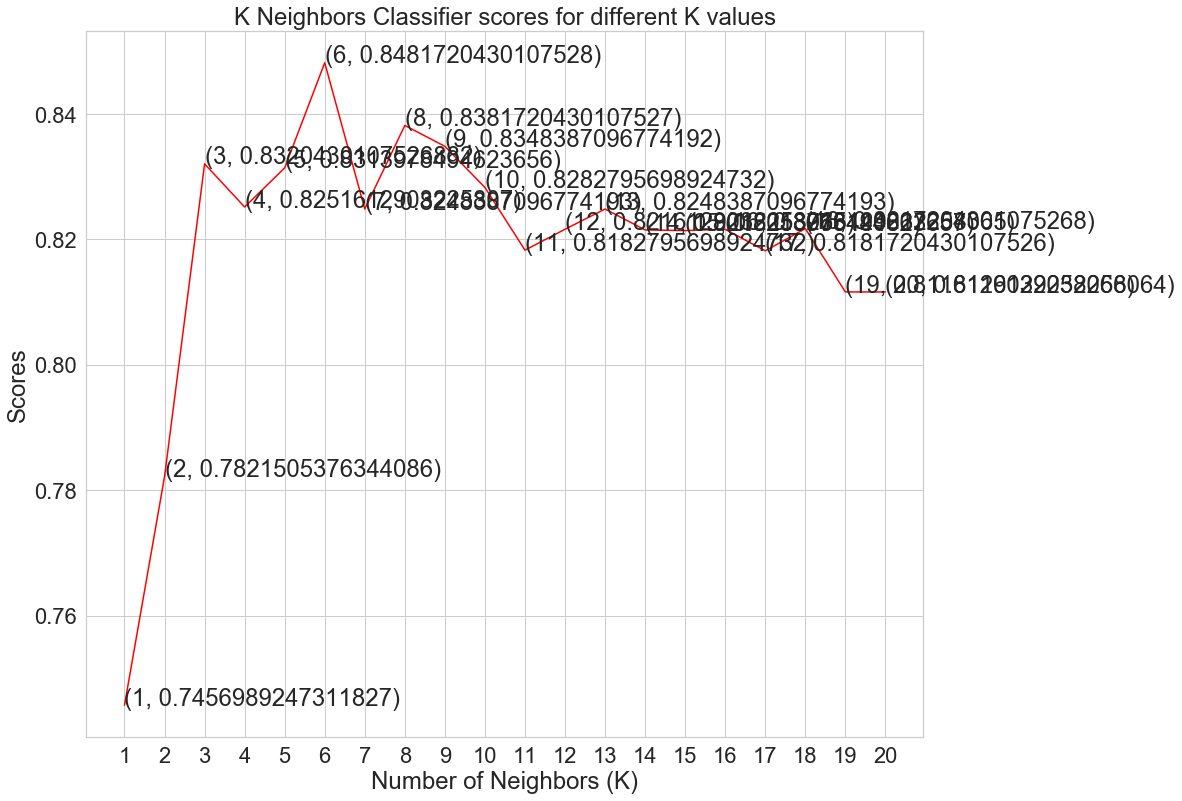

In [18]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [20]:
score.mean()

0.8216129032258065

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [23]:
score.mean()

0.8183870967741935

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn,X,y,cv=10)
print(score.mean())

0.8313978494623656


In [25]:
decisiontree_classifier = DecisionTreeClassifier(random_state=42)
score = cross_val_score(decisiontree_classifier,X,y,cv=10)
print(score.mean())

0.7288172043010752


In [32]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

In [33]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
score = cross_val_score(clf,X,y,cv=10)
print(score.mean())

0.784731182795699


In [34]:
xgb = XGBClassifier(objective='reg:squarederror')
score = cross_val_score(xgb,X,y,cv=10)
print(score.mean())

0.8245161290322581
